In [11]:
import pandas as pd
import sys
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib as joblib
import tensorflow as tf
from tensorflow import keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import model_from_json,Model, load_model
from tensorflow.keras.layers import Dense, Input, Activation, BatchNormalization,Add,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback, TensorBoard

import datetime
from sklearn.model_selection import train_test_split
import os

In [12]:
os.getcwd()

'e:\\Codes\\Mantis-Shrimp-Eye-s-Collision-Avoidance'

In [3]:
os.chdir("../")
os.getcwd()

'e:\\Codes\\Mantis-Shrimp-Eye-s-Collision-Avoidance'

In [4]:
sys.path.append(os.getcwd()+"/tools")

In [13]:
from configmanager import ConfigurationManager
configurationManager = ConfigurationManager()

## Preprocess

In [14]:
dnn_rnn_dataset =  configurationManager.config_readable['dnn_rnn_dataset']
models_path_folder = configurationManager.config_readable['models_path_folder']

path_dnn_train = dnn_rnn_dataset+"fake_dnn_train.csv"
path_dnn_train = dnn_rnn_dataset+"dnn_train.csv"


df_train = pd.read_csv(path_dnn_train)
df_train

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,229,1551.358765,1121.692017,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,698.099154
1,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,230,1559.000000,1123.400000,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,692.553591
2,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,231,1561.330688,1119.515991,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,687.144329
3,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,232,1564.058960,1123.598999,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,681.758264
4,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,233,1563.531860,1124.573975,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,676.482461
...,...,...,...,...,...,...,...,...,...,...,...
7491,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1189,772.307692,233.076923,146.923077,176.153846,25881.065089,D://airborne-detection-starter-kit/data/part1/...,50.643230
7492,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1190,716.923077,136.923077,170.000000,194.615385,33084.615385,D://airborne-detection-starter-kit/data/part1/...,46.777990
7493,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1191,654.615385,21.538462,188.461538,230.000000,43346.153846,D://airborne-detection-starter-kit/data/part1/...,43.162551
7494,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1192,593.076923,4.615385,203.846154,147.692308,30106.508876,D://airborne-detection-starter-kit/data/part1/...,39.686723


In [ ]:
'''
@dataclass
class ObjectTypes(Enum):
    Airplane = 0
    Helicopter = 1
    Bird = 2
    Drone = 3
    Flock = 4
    Airborne = 5
'''

In [15]:
df_train['object_type'].replace('Airplane', 0, inplace=True)
df_train['object_type'].replace('Helicopter', 1, inplace=True)
df_train['object_type'].replace('Bird', 2, inplace=True)
df_train['object_type'].replace('Drone', 3, inplace=True)
df_train['object_type'].replace('Flock', 4, inplace=True)
df_train['object_type'].replace('Airborne', 5, inplace=True)
df_train.head()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,229,1551.358765,1121.692017,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,698.099154
1,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,230,1559.000000,1123.400000,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,692.553591
2,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,231,1561.330688,1119.515991,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,687.144329
3,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,232,1564.058960,1123.598999,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,681.758264
4,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,233,1563.531860,1124.573975,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,676.482461


In [8]:
'''df_train.width = df_train.width.astype(int)
df_train.height = df_train.height.astype(int)
df_train.range_distance = df_train.range_distance.astype(int)

df_train.head()'''

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,229,1551.358765,1121.692017,16,16,256.0,D://airborne-detection-starter-kit/data/part1/...,698
1,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,230,1559.000000,1123.400000,16,16,256.0,D://airborne-detection-starter-kit/data/part1/...,692
2,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,231,1561.330688,1119.515991,16,16,256.0,D://airborne-detection-starter-kit/data/part1/...,687
3,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,232,1564.058960,1123.598999,16,16,256.0,D://airborne-detection-starter-kit/data/part1/...,681
4,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,233,1563.531860,1124.573975,16,16,256.0,D://airborne-detection-starter-kit/data/part1/...,676


In [8]:
df_train.describe()

,object_type,frame_id,left,top,width,height,area,range_distance
count,7496.000000,7496.000000,7496.000000,7496.000000,7496.000000,7496.000000,7496.000000,7496.000000
mean,0.834845,590.119797,1494.304716,1151.496901,38.551025,27.412477,1592.686738,339.365850
std,0.371345,331.339916,463.791274,218.193535,36.316206,19.422560,3917.663843,163.452879
min,0.000000,2.000000,0.000000,3.687500,4.000000,6.000000,36.000000,36.513925
25%,1.000000,315.750000,1219.607030,1044.168005,16.600531,16.000000,272.616169,213.134999
50%,1.000000,557.000000,1466.073283,1122.835735,27.052722,22.828730,566.080921,295.496892
75%,1.000000,885.250000,1837.091748,1275.795105,44.570993,31.541043,1321.119246,461.467870
max,1.000000,1201.000000,2441.400000,1997.333333,361.204013,241.395349,52605.001594,699.786453


## Train

In [16]:
class DistanceTrain:

    def __init__(self,df_train,distance_folder_path,before_model=None,epoch=2000):

        self.path = distance_folder_path
        self.before_model = before_model

        self.epoch = epoch

        self.df_train = df_train


    def distance_train(self, ):
        # ----------- import data and scaling ----------- #
        #df_train = pd.read_csv(path_dnn_train)
        #df_test = pd.read_csv(self.path + '/datasets/test.csv')

        #X_train = df_train[['xmin', 'ymin', 'xmax', 'ymax']].values
        X_train = self.df_train[['width', 'height', 'object_type']].values
        y_train = self.df_train[['range_distance']].values

        X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.1, random_state=123)

        #X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_train,y_train,train_size=.9, stratify=y_train)

        #X_test = df_test[['xmin', 'ymin', 'xmax', 'ymax']].values
        #y_test = df_test[['zloc']].values

        # standardized data
        scalar = StandardScaler()
        X_train = scalar.fit_transform(X_train)
        scaler_filename = self.path+"/dnn/xtrain_scaler.save"
        joblib.dump(scalar, scaler_filename)
        
        y_train = scalar.fit_transform(y_train)
        scaler_filename = self.path+"/dnn/ytrain_scaler.save"
        joblib.dump(scalar, scaler_filename)
        
        # ----------- create model ----------- #
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(6, input_dim=3, kernel_initializer='normal', activation='relu'))
        model.add(tf.keras.layers.Dense(5, kernel_initializer='normal', activation='relu'))
        model.add(tf.keras.layers.Dense(2, kernel_initializer='normal', activation='relu'))
        model.add(tf.keras.layers.Dense(1, kernel_initializer='normal'))

        #model = multi_gpu_model(model, gpus=2)

        initial_learning_rate = 0.1
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate,
            decay_steps=100000,
            decay_rate=0.96,
            staircase=True)
        opt= tf.keras.optimizers.SGD(learning_rate=lr_schedule)
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
        opt = 'adam' #ilk hali
        
        model.compile(loss='mean_squared_error', optimizer=opt)

        # ----------- define callbacks ----------- #
        earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
        reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7,
                                        verbose=1, min_delta=1e-4, mode='min')
        #modelname = "model@{}".format(int(time.time()))
        #tensorboard = TensorBoard(log_dir=path+"logs/{}".format(modelname))
        
        modelname ="model_{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
        log_dir = self.path+"/logs/fit/" + modelname
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        callbacks = [reduce_lr_loss,
                     earlyStopping,
                     tensorboard_callback]

        callbacks = [reduce_lr_loss,
                     tensorboard_callback]

        if self.before_model !=None:
            model.load_weights(self.path+"/dnn/{}.h5".format(self.before_model))

        # ----------- start training ----------- #
        '''history = model.fit(X_train, y_train,
                                    validation_split=0.1, epochs=self.epoch, batch_size=4096,
                                    verbose=1, callbacks=callbacks,)'''
        
        history = model.fit(X_train, y_train,
                                    validation_split=0.1, epochs=self.epoch, batch_size=2048,
                                    verbose=1,)

        # ----------- save model and weights ----------- #
        '''model_json = model.to_json()
        with open(self.path+"/dnn/{}.json".format(modelname), "w") as json_file:
            json_file.write(model_json)'''

        '''model.save_weights(self.path+"/dnn/{}.h5".format(modelname))'''

        model.save(self.path+"/dnn/{}.h5".format(modelname))
        print("model name:   "+ modelname)
        print("Saved model to disk")

In [17]:
distance_folder_path = models_path_folder
before_model= None

epoch=100

distance_train = DistanceTrain(df_train=df_train, distance_folder_path=distance_folder_path, before_model=before_model, epoch=epoch)
distance_train.distance_train()

Epoch 1/100
3/3 [==============================] - 0s 55ms/step - loss: 0.9922 - val_loss: 1.0706
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9922 - val_loss: 1.0707
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9921 - val_loss: 1.0707
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9922 - val_loss: 1.0707
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.9921 - val_loss: 1.0707
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.9921 - val_loss: 1.0707
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9921 - val_loss: 1.0707
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9921 - val_loss: 1.0707
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9921 - val_loss: 1.0707
Epoch 10/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9921 - val_loss: 1.0707
Epoch 11/100
3/3 [=

## Prediction

In [11]:
class DistancePrediction:

    def __init__(self,df_test,distance_folder_path,model=None):

        self.df_test = df_test

        self.path = distance_folder_path
        self.model = model

        self.scalar_X = joblib.load(self.path+"/dnn/xtrain_scaler.save")

        json_file = open(self.path+'/dnn/{}.json'.format(self.model), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.loaded_model = model_from_json( loaded_model_json )

        # load weights into new model
        self.loaded_model.load_weights(self.path+"/dnn/{}.h5".format(self.model))
        print("Loaded model from disk")

        self.scalar_y = joblib.load(self.path+"/dnn/ytrain_scaler.save")

    def distance_data_prediction(self):
        # get data
        #df_test = pd.read_csv(self.path+'/datasets/train.csv')

        X_test = self.df_test[['width', 'height', 'object_type']].values
        print("X_test[0]",X_test[0])
        y_test = self.df_test[['range_distance']].values
        y_test = y_test

        # standardized data
        scalar = joblib.load(self.path+"/dnn/xtrain_scaler.save")
        X_test = scalar.transform(X_test)
        print("scalar.transform(X_test) X_test[0]",X_test[0])
        
        scalar = joblib.load(self.path+"/dnn/ytrain_scaler.save")
        y_test = scalar.transform(y_test)

        # load json and create model
        json_file = open(self.path+'/dnn/{}.json'.format(self.model), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json( loaded_model_json )

        # load weights into new model
        loaded_model.load_weights(self.path+"/dnn/{}.h5".format(self.model))
        print("Loaded model from disk")

        # evaluate loaded model on test data
        loaded_model.compile(loss='mean_squared_error', optimizer='adam')
        y_pred = loaded_model.predict(X_test)
        print("loaded_model.predict")

        # scale up predictions to original values
        y_pred = scalar.inverse_transform(y_pred)
        print("y_pred[0]",y_pred[0])

        y_test = scalar.inverse_transform(y_test)
        print("y_test[0]",y_test[0])

        # save predictions
        df_result = self.df_test
        df_result['range_distance_pred'] = -100000
        df_result['score'] = -100000
        

        for idx, row in df_result.iterrows():
            #print("idx",idx)
            df_result.at[idx, 'range_distance_pred'] = int(y_pred[idx])
            df_result.at[idx, 'score'] = int(y_test[idx]-y_pred[idx])

        df_result.to_csv(dnn_rnn_dataset+'/dnn_predictions.csv', index=False)
        return df_result


    def distance_single_prediction(self,xmin, ymin, xmax, ymax, width,height,object_type):
        # get data
        
        X_test = [[width, height, object_type]]
        #print("X_test",X_test)
        # standardized data
        #scalar = StandardScaler()
   
        X_test = self.scalar_X.transform(X_test)
        #print("scalar.transform(X_test)",X_test)

        # evaluate loaded model on test data
        #self.loaded_model.compile(loss='mean_squared_error', optimizer='adam')
        
        '''    temp = [[xmin]]
        print("temp",temp)
        temp = scalar.transform(temp)
        temp = scalar.transform(temp)
        print("scalar.transform(temp)",temp)
        temp = scalar.inverse_transform(temp)
        print("scalar.inverse_transform(temp)",temp)'''
        

        y_pred = self.loaded_model.predict(X_test)
        #print("loaded_model.predict(X_test)",y_pred)
        
        

        # scale up predictions to original values
        y_pred = self.scalar_y.inverse_transform(y_pred)
        #print("scalar.inverse_transform(y_pred)",y_pred)
        
        return y_pred[0][0]

In [12]:
distance_folder_path = models_path_folder
model_path = "model_20230320-164738"
distance_prediction = DistancePrediction(df_test=df_train,distance_folder_path=distance_folder_path, model=model_path)


Loaded model from disk


### Single Prediction

In [13]:
x1_y1= (100, 150) 	
x2_y2= ( 200,250)

object_type = 1

x1=x1_y1[0]
y1=x1_y1[1]
x2=x2_y2[0]
y2=x2_y2[1]

width=x2-x1
height=y2-y1

distance=distance_prediction.distance_single_prediction(xmin=x1,ymin=y1,xmax=x2,ymax=y2,width= width,height=height,object_type=object_type)  #model_20200407-162540
print("distance: ", distance)

distance:  85.0103


### Test csv Prediction

In [14]:
predictions = distance_prediction.distance_data_prediction()
print(predictions)

X_test[0] [16. 16.  1.]
scalar.transform(X_test) X_test[0] [-0.62072033 -0.58606902  0.44546231]
Loaded model from disk
loaded_model.predict
y_pred[0] [539.5475]
y_test[0] [698.0991541]
                             flight_id  object_type       object  frame_id  \
0     0001ba865c8e410e88609541b8f55ffc            1  Helicopter1       229   
1     0001ba865c8e410e88609541b8f55ffc            1  Helicopter1       230   
2     0001ba865c8e410e88609541b8f55ffc            1  Helicopter1       231   
3     0001ba865c8e410e88609541b8f55ffc            1  Helicopter1       232   
4     0001ba865c8e410e88609541b8f55ffc            1  Helicopter1       233   
...                                ...          ...          ...       ...   
7491  0549559b37d741389e3dec0fcd62b161            1  Helicopter1      1189   
7492  0549559b37d741389e3dec0fcd62b161            1  Helicopter1      1190   
7493  0549559b37d741389e3dec0fcd62b161            1  Helicopter1      1191   
7494  0549559b37d741389e3dec0fcd62

In [15]:
print(predictions['range_distance'].describe(include=['category']))

count    7496.000000
mean      339.365850
std       163.452879
min        36.513925
25%       213.134999
50%       295.496892
75%       461.467870
max       699.786453
Name: range_distance, dtype: float64


In [16]:
print(predictions['range_distance_pred'].describe(include=['category']))

count    7496.000000
mean      338.027348
std       152.614510
min        85.000000
25%       203.000000
50%       301.000000
75%       539.000000
max       654.000000
Name: range_distance_pred, dtype: float64


In [17]:
path_dnn_pred = dnn_rnn_dataset+"dnn_predictions.csv"

dnn_predictions = pd.read_csv(path_dnn_pred)
dnn_predictions

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance,range_distance_pred,score
0,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,229,1551.358765,1121.692017,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,698.099154,539,158
1,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,230,1559.000000,1123.400000,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,692.553591,539,153
2,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,231,1561.330688,1119.515991,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,687.144329,539,147
3,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,232,1564.058960,1123.598999,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,681.758264,539,142
4,0001ba865c8e410e88609541b8f55ffc,1,Helicopter1,233,1563.531860,1124.573975,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,676.482461,539,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,0549559b37d741389e3dec0fcd62b161,1,Helicopter1,1189,772.307692,233.076923,146.923077,176.153846,25881.065089,D://airborne-detection-starter-kit/data/part1/...,50.643230,85,-34
7492,0549559b37d741389e3dec0fcd62b161,1,Helicopter1,1190,716.923077,136.923077,170.000000,194.615385,33084.615385,D://airborne-detection-starter-kit/data/part1/...,46.777990,85,-38
7493,0549559b37d741389e3dec0fcd62b161,1,Helicopter1,1191,654.615385,21.538462,188.461538,230.000000,43346.153846,D://airborne-detection-starter-kit/data/part1/...,43.162551,85,-41
7494,0549559b37d741389e3dec0fcd62b161,1,Helicopter1,1192,593.076923,4.615385,203.846154,147.692308,30106.508876,D://airborne-detection-starter-kit/data/part1/...,39.686723,85,-45


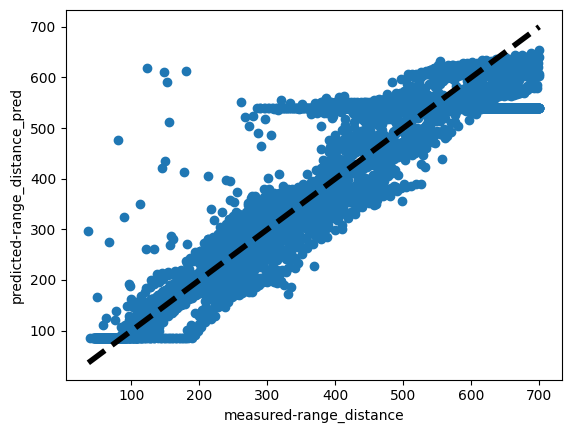

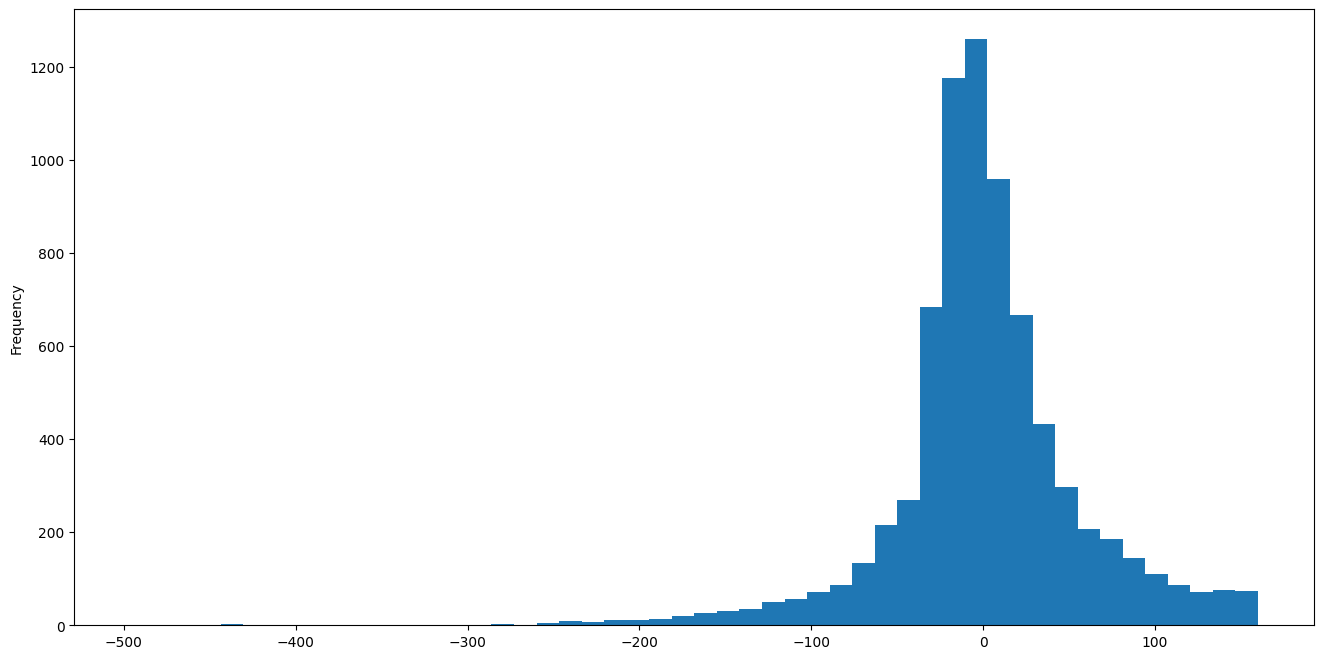

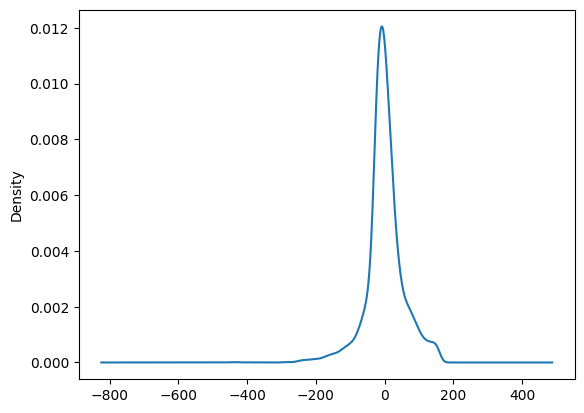

count    7496.000000
mean        0.873799
std        55.814064
min      -496.000000
25%       -22.000000
50%        -2.000000
75%        24.000000
max       160.000000
Name: score, dtype: float64


In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

y_test = predictions['range_distance']
y_predicted = predictions['range_distance_pred']

ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured-range_distance')
ax.set_ylabel('predicted-range_distance_pred')
plt.show()


predictions['score'].plot(kind="hist", bins=50,figsize=(16,8))
plt.show()


predictions['score'].plot(kind="kde")
plt.show()

print(predictions['score'].describe(include=['category']))